In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 42.3MB/s 
     |████████████████████████████████| 4.3MB 41.2MB/s 


## Dropout 
##### Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

![alt text](http://perso.mines-paristech.fr/fabien.moutarde/ES_MachineLearning/TP_convNets/drop.png)

![alt text](https://miro.medium.com/max/935/1*4T4y3kI0R9Alk_2pe6B4Pg.png)


![alt text](https://miro.medium.com/max/886/1*WRio7MD4JDeLww-CyrxEbg.png)

## Normalization brings all the inputs centered around 0. This way, there is not much change in each layer input. So, layers in the network can learn from the back-propagation simultaneously, without waiting for the previous layer to learn. This fastens up the training of networks.

<img src = "https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif">

# VGG16 Model

![alt text](https://qph.fs.quoracdn.net/main-qimg-e657c195fc2696c7d5fc0b1e3682fde6)


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout , Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 42.62 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
  datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_genrator = datagen.flow_from_directory(directory=train_data_dir,
                                             target_size=(img_height,img_width),
                                             classes =['dogs','cats'],
                                             class_mode='binary',
                                             batch_size=batch_size)


Found 20000 images belonging to 2 classes.


In [10]:
train_genrator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
validation_genrator = datagen.flow_from_directory(directory=test_data_dir,
                                            target_size=(img_height,img_width),
                                            classes=['dogs','cats'],
                                            class_mode='binary',
                                            batch_size=batch_size)


Found 5000 images belonging to 2 classes.


In [0]:
## Build CNN Base Model

In [0]:
model =  Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',
                 input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit_generator(generator=train_genrator, steps_per_epoch=len(train_genrator),epochs=5,
                              validation_data=validation_genrator,validation_steps=len(validation_genrator),verbose=1)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1000/1000 [==============================] - 122s 122ms/step - loss: 0.6980 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/5
1000/1000 [==============================] - 121s 121ms/step - loss: 0.6808 - accuracy: 0.5534 - val_loss: 0.6559 - val_accuracy: 0.6162
Epoch 3/5
1000/1000 [==============================] - 121s 121ms/step - loss: 0.6245 - accuracy: 0.6549 - val_loss: 0.5635 - val_accuracy: 0.7162
Epoch 4/5
1000/1000 [==============================] - 122s 122ms/step - loss: 0.5451 - accuracy: 0.7255 - val_loss: 0.5397 - val_accuracy: 0.7308
Epoch 5/5
1000/1000 [==============================] - 123s 123ms/step - loss: 0.5001 - accuracy: 0.7556 - val_loss: 0.5668 - val_accuracy: 0.7238


In [0]:
def plot_learningCurve(history):
  #Plot training and validation accuracy
  epoch_range = range(1,6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Acuuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

  #Plot trainning and valiation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

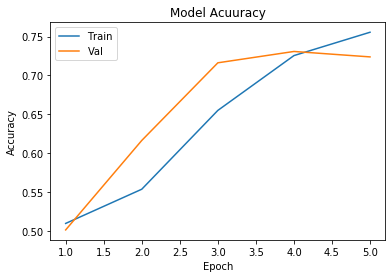

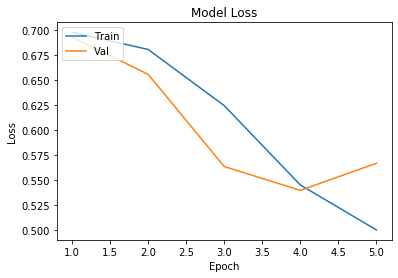

In [22]:
plot_learningCurve(history)

In [0]:
## Impliment First 3 Blocks of VGG16 Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',
                 input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'
                 ))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(1,activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit_generator(generator=train_genrator, steps_per_epoch=len(train_genrator),epochs = 5 ,
                              validation_data=validation_genrator, validation_steps=len(validation_genrator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 258s 258ms/step - loss: 0.6378 - accuracy: 0.6327 - val_loss: 0.6623 - val_accuracy: 0.6592
Epoch 2/5
1000/1000 [==============================] - 254s 254ms/step - loss: 0.5154 - accuracy: 0.7476 - val_loss: 0.5087 - val_accuracy: 0.7442
Epoch 3/5
1000/1000 [==============================] - 251s 251ms/step - loss: 0.4650 - accuracy: 0.7800 - val_loss: 0.4525 - val_accuracy: 0.7842
Epoch 4/5
1000/1000 [==============================] - 256s 256ms/step - loss: 0.4152 - accuracy: 0.8098 - val_loss: 0.4476 - val_accuracy: 0.7920
Epoch 5/5
1000/1000 [==============================] - 257s 257ms/step - loss: 0.3714 - accuracy: 0.8346 - val_loss: 0.4732 - val_accuracy: 0.7856


In [0]:
## Batch Normalization and Dropout

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit_generator(generator=train_genrator, steps_per_epoch=len(train_genrator), epochs = 10, validation_data=validation_genrator, 
                              validation_steps=len(validation_genrator), verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 400s 400ms/step - loss: 0.6862 - accuracy: 0.6059 - val_loss: 0.6983 - val_accuracy: 0.5946
Epoch 2/10
1000/1000 [==============================] - 377s 377ms/step - loss: 0.6030 - accuracy: 0.6849 - val_loss: 0.5662 - val_accuracy: 0.7086
Epoch 3/10
1000/1000 [==============================] - 381s 381ms/step - loss: 0.5621 - accuracy: 0.7236 - val_loss: 0.5350 - val_accuracy: 0.7362
Epoch 4/10
1000/1000 [==============================] - 384s 384ms/step - loss: 0.5342 - accuracy: 0.7377 - val_loss: 0.5250 - val_accuracy: 0.7430
Epoch 5/10
1000/1000 [==============================] - 383s 383ms/step - loss: 0.5172 - accuracy: 0.7555 - val_loss: 0.5143 - val_accuracy: 0.7434
Epoch 6/10
1000/1000 [==============================] - 385s 385ms/step - loss: 0.5021 - accuracy: 0.7527 - val_loss: 0.5115 - val_accuracy: 0.7534
Epoch 7/10
1000/1000 [==============================] - 391s 391ms/step - loss: 0.4915 - accuracy: 0.7638 - val_

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

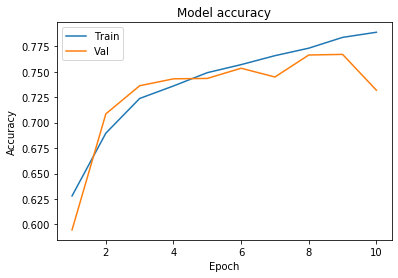

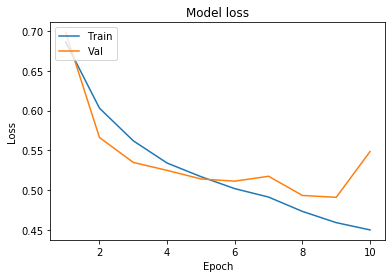

In [36]:
plot_learningCurve(history, 10)